<a href="https://colab.research.google.com/github/Kevincruz2019/tfm/blob/main/tratamiento_data_tweeter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de interacción con datos extraído desde la cuenta oficial del Instituto Superior Tecnológico Guayaquil, red Social Twitter. 

**Objetivos**


1.   Preparar los datos en un formato adecuado para el entrenamiento del modelo. Asegúrandonos de tener una columna que represente la variable objetivo (cantidad de likes o retweets) y las características relevantes (fecha de publicación, Seguidores, menciones) en columnas separadas.


2.   Dividir los datos en un conjunto de entrenamiento y un conjunto de prueba utilizando la función train_test_split de scikit-learn. Esto te permitirá evaluar el rendimiento del modelo en datos no vistos.


5.   Eligir un modelo de aprendizaje automático adecuado para esta actividad. 


6.   Ajustar el modelo a los datos de entrenamiento utilizando la función fit del modelo seleccionado. Proporciona las características y la variable objetivo correspondiente para entrenar el modelo.




7.  Utilizando técnicas de aprendizaje automático, construir modelos predictivos para estimar la cantidad de likes o retweets que podría recibir una publicación en función de características como la fecha de publicación, seguidores o menciones. Tambien conocer mediante este modelo si una publicación podría llegar a ser exitosa o no. Esto te permitirá prever el impacto potencial de una publicación antes de compartirla.

8.   Evalúar el rendimiento del modelo utilizando métricas apropiadas. 





En esta parte se esta importando varias librerías de Python relacionadas con el análisis de datos y el aprendizaje automático (machine learning). A continuación, te explicaré brevemente qué hace cada una de estas librerías y por qué podrías usarlas en tu código:

**pandas:** Es una librería muy popular para el análisis de datos en Python. Proporciona estructuras de datos flexibles y eficientes para trabajar con conjuntos de datos tabulares, como dataframes. Permite cargar datos desde diferentes fuentes, realizar transformaciones y manipulaciones de datos, y realizar operaciones estadísticas.

**numpy:** Es una librería fundamental para el cálculo numérico en Python. Proporciona una amplia gama de funciones y herramientas para trabajar con matrices y realizar operaciones matemáticas eficientes. Es particularmente útil para el procesamiento y análisis de datos numéricos.

**seaborn:** Es una librería de visualización de datos basada en Matplotlib. Proporciona una interfaz de alto nivel para crear gráficos estadísticos atractivos y visualmente informativos. Seaborn ofrece una variedad de funciones para crear rápidamente gráficos de barras, diagramas de dispersión, gráficos de cajas, mapas de calor y más.

**matplotlib.pyplot:** Es una librería ampliamente utilizada para crear visualizaciones en Python. Proporciona una interfaz similar a la de MATLAB y se utiliza principalmente para generar gráficos estáticos, como gráficos de líneas, de dispersión, de barras, histogramas, entre otros.

**sklearn.linear_model.LogisticRegression:** Es una clase de la librería scikit-learn (sklearn) que implementa el algoritmo de regresión logística. La regresión logística es un método de clasificación utilizado para predecir la probabilidad de que una instancia pertenezca a una clase en particular.

**sklearn.model_selection.train_test_split:** Es una función de scikit-learn que se utiliza para dividir un conjunto de datos en conjuntos de entrenamiento y prueba. Esto es útil para evaluar el rendimiento de un modelo de aprendizaje automático, ya que permite entrenar el modelo en un conjunto de datos y luego evaluarlo en datos no vistos.

**sklearn.metrics:** Es un módulo de scikit-learn que proporciona métricas de evaluación para evaluar el rendimiento de modelos de aprendizaje automático. Las métricas incluyen la precisión (accuracy), el recall, el R2 score, entre otros.

**scipy.stats.spearmanr:** Es una función de la librería SciPy que calcula el coeficiente de correlación de Spearman entre dos variables. Este coeficiente mide la relación monotónica entre las variables, lo cual es útil para analizar relaciones no lineales.

**sklearn.tree.DecisionTreeClassifier:** Es una clase de scikit-learn que implementa el algoritmo de árbol de decisiones para la clasificación. Los árboles de decisiones son un método de aprendizaje supervisado que se utiliza para clasificar instancias en diferentes clases utilizando reglas de decisión basadas en características.

**sklearn.tree.plot_tree:** Es una función de scikit-learn que se utiliza para visualizar el árbol de decisiones generado por un modelo entrenado. Esta función permite ver

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, r2_score
from scipy.stats import spearmanr
from sklearn.tree import DecisionTreeClassifier, plot_tree

Después de ejecutar esta línea de código, los datos del archivo CSV se cargarán en el DataFrame 'data', y se podrá utilizar para realizar operaciones y análisis.

In [3]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv('datos_twitter.csv', encoding= 'Utf-8')

Al ejecutar data.head(10), se esta solicitando visualizar las primeras 10 filas de los datos cargados en el DataFrame data. 

In [4]:
data.head(10)

,Fecha,Texto,Longitud,Likes,Retweets,Seguidores,Menciones,Hashtags
0,14/5/2023,Hoy se llevó a cabo la posesión del nuevo alca...,271,15,6,NaN,NaN,NaN
1,13/5/2023,En el campus Guayaquil y en el Campus CMI cele...,263,16,6,NaN,NaN,NaN
2,11/5/2023,Hoy tuvimos la socialización con la participac...,247,5,5,NaN,NaN,NaN
3,11/5/2023,Te invitamos a la rendición de cuentas 2022 🚨\...,162,12,8,NaN,NaN,NaN
4,11/5/2023,Levante la mano quien se siente feliz al conoc...,158,8,5,NaN,NaN,NaN
5,10/5/2023,¡Contáctate con nosotros! Te dejamos los corre...,142,4,5,NaN,NaN,NaN
6,10/5/2023,La Gestoría de Arte y Cultura tiene diferentes...,297,6,6,NaN,NaN,NaN
7,10/5/2023,RT @istg_ec: 👉 NivelTEC amplió sus inscripcion...,140,0,8,NaN,NaN,NaN
8,9/5/2023,👉 NivelTEC amplió sus inscripciones 👈\n\nParti...,301,9,8,NaN,NaN,NaN
9,9/5/2023,👉 NivelTEC amplió sus inscripciones 👈\n\nParti...,301,6,2,NaN,NaN,NaN


Al ejecutar print(data.shape), vamos a obtener  la forma (shape) de los datos cargados en el DataFrame data. La forma de un DataFrame en pandas es una tupla que indica el número de filas y columnas presentes en el DataFrame, lo utilizamos para conocer cuantas filas y columnas tienen nuestro registro.

In [5]:
# Columnas Vs Filas
print(data.shape)

(9711, 8)


Inspeccionamos inicialmente los tipos de datos

In [6]:
# Obtener los tipos de datos de las columnas
tipos_datos = data.dtypes.reset_index()
tipos_datos.columns = ['Columna', 'Tipo de Dato']

# Crear el estilo de la tabla
estilo_tabla = tipos_datos.style \
    .set_table_styles([
        {'selector': 'th', 'props': [('border', '1px solid black')]}
    ]) \

# Imprimir la tabla de tipos de datos con estilo
print('Tipos de Datos de las Columnas')
display(estilo_tabla)

Tipos de Datos de las Columnas


,Columna,Tipo de Dato
0,Fecha,object
1,Texto,object
2,Longitud,int64
3,Likes,int64
4,Retweets,int64
5,Seguidores,float64
6,Menciones,float64
7,Hashtags,float64


# **Análisis de datos faltantes**

 Se está generando un mapa de calor (heatmap) utilizando la biblioteca Seaborn en Python. El objetivo es visualizar los valores faltantes en las primeras 10 columnas del dataframe llamado 'data'.

<Axes: >

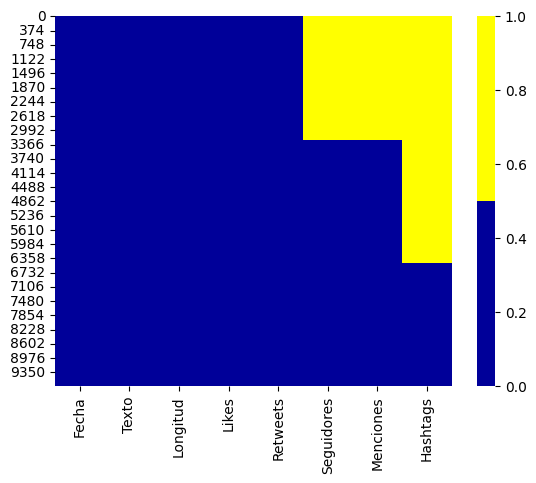

In [7]:
cols = data.columns[:10] 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

Se calcula el porcentaje de valores faltantes para cada atributo de entrada en el dataframe 'data'. Luego, se imprime una tabla que muestra el nombre del atributo y el porcentaje de valores faltantes correspondiente.

In [8]:
# Porcentaje de los valores faltantes por atributo de entrada
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('| {:<20} | {:>6.2f}% |'.format(col, round(pct_missing*100, 2)))

# Imprimir línea de separación
print('-' * 31)

| Fecha                |   0.00% |
| Texto                |   0.00% |
| Longitud             |   0.00% |
| Likes                |   0.00% |
| Retweets             |   0.00% |
| Seguidores           |  33.33% |
| Menciones            |  33.33% |
| Hashtags             |  66.67% |
-------------------------------


Se elimina la columna "Hashtags" del dataframe 'data' utilizando el método "drop()".La decisión de eliminar la columna "Hashtags" del conjunto de datos se basa en el hecho de que presenta un alto porcentaje de datos faltantes, alcanzando un 66.67%. Los datos faltantes en una columna pueden afectar negativamente el análisis y los resultados obtenidos, ya que la falta de información puede introducir sesgos o distorsionar la interpretación de los resultados.


In [9]:
# Eliminar la columna "columna_eliminar"
data = data.drop("Hashtags", axis=1)

In [10]:
print(data.columns)

Index(['Fecha', 'Texto', 'Longitud', 'Likes', 'Retweets', 'Seguidores',
       'Menciones'],
      dtype='object')


En este paso del análisis de datos, se está imputando los valores faltantes de las columnas "Seguidores" y "Menciones" utilizando la media de los valores existentes en cada columna. Este proceso se realiza para abordar el problema de los datos faltantes y garantizar que todas las filas tengan valores válidos en estas variables.

La imputación de los valores faltantes con la media es una técnica comúnmente utilizada cuando los datos faltantes son numéricos. Se elige la media como medida central para reemplazar los valores faltantes, ya que proporciona una estimación razonable basada en la distribución existente de los datos.

Al imputar los valores faltantes con la media, se busca preservar la estructura y las características generales del conjunto de datos, evitando distorsiones o sesgos significativos que podrían surgir de otros métodos de imputación. Esta estrategia también permite mantener el tamaño y la integridad del conjunto de datos original.

In [11]:
# Imputar los valores faltantes de las columnas con la media
data["Seguidores"] = data["Seguidores"].fillna(data["Seguidores"].mean())
data["Menciones"] = data["Menciones"].fillna(data["Menciones"].mean())

En base al resultado obtenido al generar un mapa de calor de los valores faltantes en las primeras 10 columnas del conjunto de datos, se puede observar que ya no hay datos vacíos presentes. El mapa de calor muestra visualmente la presencia o ausencia de valores faltantes en cada columna, donde el color amarillo indica la ausencia de datos y el color azul indica la presencia de datos.

<Axes: >

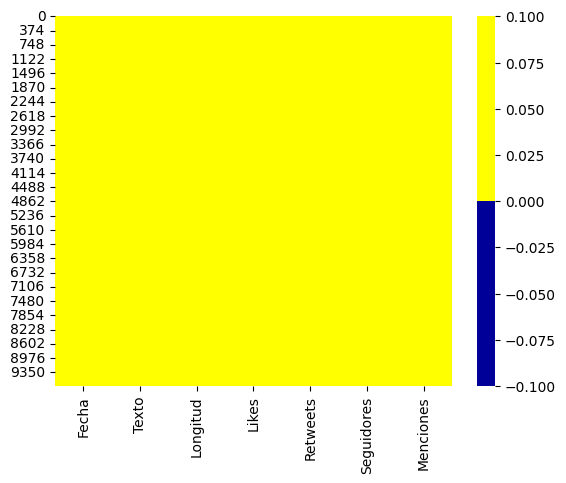

In [12]:
cols = data.columns[:10] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

En base al cálculo del porcentaje de valores faltantes por atributo de entrada en el conjunto de datos, se puede observar que ya no existen datos vacíos. Cada columna ha sido evaluada y se ha determinado el porcentaje de valores faltantes en relación al total de registros.

In [13]:
# Porcentaje de los valores faltantes por atributo de entrada
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('| {:<20} | {:>6.2f}% |'.format(col, round(pct_missing*100, 2)))

# Imprimir línea de separación
print('-' * 31)

| Fecha                |   0.00% |
| Texto                |   0.00% |
| Longitud             |   0.00% |
| Likes                |   0.00% |
| Retweets             |   0.00% |
| Seguidores           |   0.00% |
| Menciones            |   0.00% |
-------------------------------


La creación de la variable objetivo "Interaccion" en el conjunto de datos es un paso fundamental en este estudio. Esta variable se obtiene sumando los valores de las columnas "Likes" y "Retweets", lo cual permite cuantificar la interacción de los usuarios con las publicaciones del instituto en Twitter.

La inclusión de esta variable objetivo es relevante para analizar y evaluar el nivel de participación y el interés de los usuarios en las publicaciones. Al combinar las métricas de "Likes" y "Retweets", se obtiene una medida integral de la interacción, capturando tanto la respuesta positiva de los usuarios (a través de los "Likes") como su voluntad de compartir la publicación con su propia audiencia (mediante los "Retweets").

In [14]:
data['Interaccion'] = data['Likes'] + data['Retweets']

Se procedió a calcular la matriz de correlación utilizando el método de Spearman en el conjunto de datos. Este enfoque es especialmente útil cuando se trata de analizar relaciones no lineales o cuando las variables no siguen una distribución normal.

Al examinar la matriz de correlación de Spearman, se observa que las variables "Retweets" y "Likes" muestran una correlación más fuerte con la variable objetivo "Interaccion" en comparación con otras variables del conjunto de datos. Esta correlación positiva indica que a medida que aumentan los valores de "Retweets" y "Likes", también tiende a aumentar la cantidad de interacción de los usuarios con las publicaciones del instituto en Twitter.

Estos hallazgos son consistentes con la intuición, ya que es de esperar que las publicaciones que generen más retweets y likes también generen una mayor interacción por parte de los usuarios. Esta correlación positiva sugiere que estas dos variables pueden desempeñar un papel importante en la predicción o estimación de la interacción de los usuarios en futuras publicaciones.

In [15]:
# Calcular la matriz de correlación de Spearman
corr_matrix = data.corr(method='spearman')

<ipython-input-15-e8f4f97dd829>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr(method='spearman')


<Axes: >

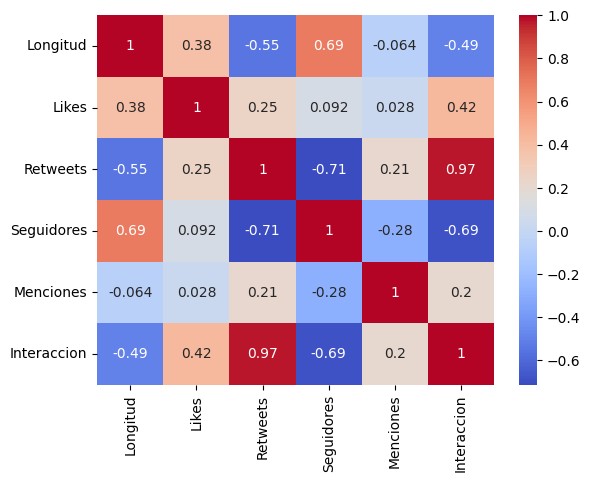

In [16]:
# Generar un gráfico de correlación utilizando el mapa de calor de Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


In [17]:
# Obtener los valores de correlación con la variable objetivo y ordenarlos de forma descendente
correlation_with_target = corr_matrix['Interaccion'].drop('Interaccion').sort_values(ascending=False)

# Imprimir los valores de correlación con la variable objetivo
print(correlation_with_target)

# Mostrar el gráfico de correlación
plt.show()

Retweets      0.967952
Likes         0.419415
Menciones     0.204240
Longitud     -0.494631
Seguidores   -0.691041
Name: Interaccion, dtype: float64


Se realizó un análisis para determinar la fecha con mayor importancia en términos de interacción de los usuarios. Utilizando la función "idxmax()" en la columna "Interaccion" del conjunto de datos, se identificó el índice del registro que tiene el valor máximo de interacción.

Posteriormente, se accedió a la columna "Fecha" correspondiente a dicho índice utilizando la función "loc[]" para obtener la fecha asociada a la máxima importancia en términos de interacción de los usuarios.

La variable "fecha_max_importancia" contiene ahora la fecha con mayor importancia en base a la interacción de los usuarios. Este resultado puede ser de relevancia para comprender qué publicaciones o eventos específicos generaron una mayor participación y respuesta por parte de los usuarios en el contexto del análisis realizado.

In [18]:
# Obtener la fecha con mayor importancia
fecha_max_importancia = data.loc[data['Interaccion'].idxmax(), 'Fecha']

In [19]:
# Imprimir los resultados
print(data)
print('Fecha con mayor interacción:', fecha_max_importancia)

          Fecha                                              Texto  Longitud  \
0     14/5/2023  Hoy se llevó a cabo la posesión del nuevo alca...       271   
1     13/5/2023  En el campus Guayaquil y en el Campus CMI cele...       263   
2     11/5/2023  Hoy tuvimos la socialización con la participac...       247   
3     11/5/2023  Te invitamos a la rendición de cuentas 2022 🚨\...       162   
4     11/5/2023  Levante la mano quien se siente feliz al conoc...       158   
...         ...                                                ...       ...   
9706  10/6/2018  RT @EduSuperiorEc: La Senescyt es el centro au...       140   
9707   9/6/2018  Gracias Vicentg96 por seguirnos! https://t.co/...        56   
9708   8/6/2018  Reunión de vinculación con el Ing. Rolando Roj...       206   
9709   8/6/2018  Gracias Alejando Jimenez por seguirnos! https:...        63   
9710   8/6/2018  RT @vallovig: Tutorial Cómo aplicar a Banco d ...       140   

      Likes  Retweets   Seguidores  Men

In [20]:
# Obtener las 10 fechas con mayor interacción
top_10_fechas = data.nlargest(10, 'Interaccion')['Fecha']
top_10_interacciones = data.nlargest(10, 'Interaccion')['Interaccion']
# Obtener una escala de colores en función de los valores de interacción
colores = plt.cm.viridis(np.linspace(0, 1, len(top_10_interacciones)))



Se realizó un gráfico de barras para visualizar las 10 fechas con mayor interacción en base a los datos analizados. Se utilizó una lista de colores comunes, que incluye 'red', 'blue', 'green', 'yellow', 'purple', 'black', 'brown', 'orange', 'pink' y 'gray', para colorear las barras correspondientes a cada fecha.

El eje x del gráfico representa las fechas y el eje y representa las interacciones. Cada barra muestra la cantidad de interacciones para cada fecha. El título del gráfico es "Top 10 Fechas con Mayor Interacción". Además, se rotaron los valores en el eje x en 45 grados para facilitar la lectura de las fechas.

Para proporcionar mayor precisión, se agregaron etiquetas en cada barra que muestran el valor exacto de interacciones correspondiente a cada fecha. Cada etiqueta está alineada al centro de la barra y ubicada en la parte superior de la misma, utilizando el color correspondiente de la lista de colores comunes.

Este gráfico permite identificar de manera visual las fechas con mayor interacción, lo que puede ser útil para comprender los momentos o eventos que generaron un mayor nivel de participación de los usuarios en relación a las publicaciones o actividades analizadas.

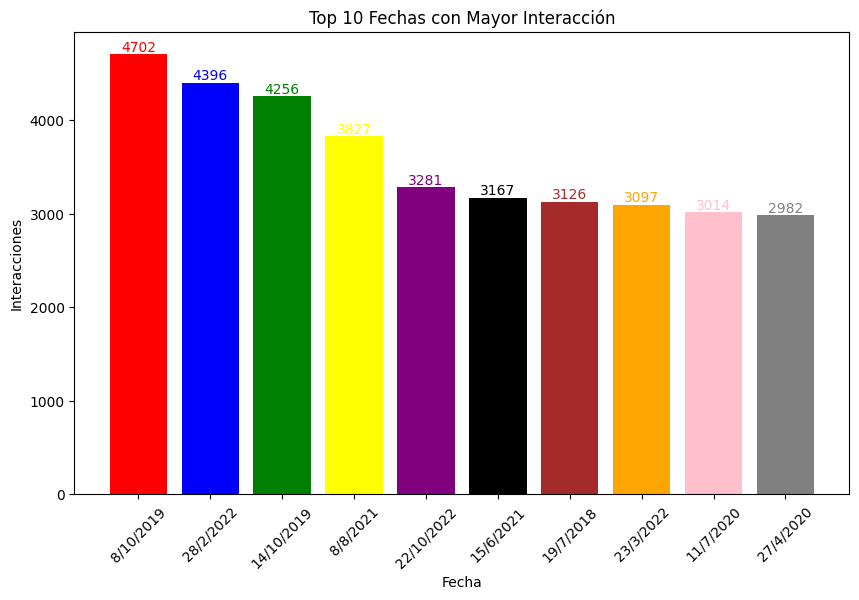

In [21]:
colores_comunes = ['red', 'blue', 'green', 'yellow', 'purple', 'black', 'brown', 'orange', 'pink', 'gray']

plt.figure(figsize=(10, 6))
plt.bar(top_10_fechas, top_10_interacciones, color=colores_comunes)
plt.xlabel('Fecha')
plt.ylabel('Interacciones')
plt.title('Top 10 Fechas con Mayor Interacción')
plt.xticks(rotation=45)

# Agregar los valores exactos en cada barra
for i, (valor, color) in enumerate(zip(top_10_interacciones, colores_comunes)):
    plt.text(top_10_fechas.iloc[i], valor, str(valor), ha='center', va='bottom', color=color)

plt.show()

In [22]:
# Obtener las 10 fechas con mayor interacción
top_10_fechas = data.nlargest(10, 'Interaccion')['Fecha']

# Filtrar las publicaciones correspondientes a las fechas seleccionadas
publicaciones_top_10 = data[data['Fecha'].isin(top_10_fechas)]['Texto']

# Imprimir las publicaciones
for fecha, publicacion in zip(top_10_fechas, publicaciones_top_10):
    print(f"Fecha: {fecha}")
    print(f"Publicación: {publicacion}")
    print("--------------")

Fecha: 8/10/2019
Publicación: RT @EduSuperiorEc: ¿Postulaste por un cupo a la educación superior? 

👇 23 de octubre será la fase de aceptación 👇

1⃣ Ingresa en: https://…
--------------
Fecha: 28/2/2022
Publicación: Ya puedes inscribirte para rendir el examen de ubicación de inglés 🧐. Te dejamos el link del formulario https://t.co/DPDb1BhitQ https://t.co/IWd5IOYano
--------------
Fecha: 14/10/2019
Publicación: ¡Un aplauso para Elias Franco! Es nuestro fan destacado por su constante interacción en nuestras redes sociales 👏❤️

#fan #interaccion #somosistg https://t.co/igy3BnWAI4
--------------
Fecha: 8/8/2021
Publicación: Te contamos los documentos que que necesitas para la matriculación 🤔.                                                      Debes estar atento al cronograma de matriculación para que puedas matricularte correctamente. https://t.co/1aExtRZl3Q
--------------
Fecha: 22/10/2022
Publicación: RT @daneyfemmejolie: Excelente evento donde tanto estudiantes como docentes muestran 

# **Modelo de regresión Logística**


En esta parte del código, se realiza la división de los datos en características (features) y la variable objetivo.

Las características, representadas por la variable X, se seleccionan de la columna de datos que contiene los valores de "Retweets" y "Likes". Estas características se utilizan para predecir la variable objetivo.

La variable objetivo, representada por la variable y, se extrae de la columna de datos correspondiente a "Interaccion". Esta variable es la que se busca predecir o explicar a partir de las características seleccionadas.

Al dividir los datos en características y variable objetivo, se crea una estructura que permite utilizar las características para entrenar un modelo predictivo y luego evaluar su capacidad para predecir la variable objetivo. Esto es fundamental en el análisis de datos y el desarrollo de modelos predictivos.

In [23]:
# Dividir los datos en características (features) y la variable objetivo
X = data[['Retweets','Likes']]  # Característica(s)
y = data['Interaccion']  # Variable objetivo

En este fragmento de código se realiza la división de los datos en conjuntos de entrenamiento y prueba, y luego se crea y entrena el modelo de regresión logística.

La función train_test_split del paquete sklearn.model_selection se utiliza para dividir los datos en conjuntos de entrenamiento y prueba. Los parámetros X y y representan las características y la variable objetivo, respectivamente. Se utiliza el parámetro test_size para especificar el tamaño del conjunto de prueba, en este caso se ha establecido en 0.2, lo que significa que el 20% de los datos se utilizarán para prueba. El parámetro random_state se utiliza para establecer una semilla aleatoria, lo que garantiza que la división de los datos sea reproducible.

Después de la división de los datos, se crea una instancia del modelo de regresión logística utilizando la clase LogisticRegression. Este modelo se asigna a la variable model.

A continuación, se entrena el modelo utilizando el método fit(), que recibe como argumentos las características de entrenamiento (X_train) y la variable objetivo de entrenamiento (y_train). El modelo utiliza estos datos para aprender los patrones y ajustar sus parámetros internos, de manera que pueda realizar predicciones precisas sobre la variable objetivo.


In [24]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Convertir las columnas de fecha a representación numérica

In [25]:
# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

En este fragmento de código se realizan predicciones en el conjunto de prueba utilizando el modelo de regresión logística previamente entrenado.

El método predict() se utiliza para realizar las predicciones en base a las características de prueba (X_test). Las predicciones resultantes se almacenan en la variable y_pred.

Posteriormente, se evalúa la precisión del modelo utilizando el método score(). Este método calcula la precisión del modelo al comparar las predicciones realizadas (y_pred) con los valores reales de la variable objetivo de prueba (y_test). El valor de precisión obtenido se almacena en la variable accuracy.

In [26]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [27]:
# Evaluar la precisión del modelo u otras métricas de evaluación
accuracy = model.score(X_test, y_test)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.1152856407617087


Basándonos en el resultado obtenido de una precisión del 11% en la predicción de la variable objetivo en el conjunto de prueba, podemos concluir que el modelo de regresión logística utilizado no es efectivo para predecir las interacciones en base a las características de "Retweets" y "Likes".

Una precisión del 11% indica que el modelo tiene un rendimiento muy bajo y no logra capturar adecuadamente la relación entre las variables predictoras y la variable objetivo. Esto puede deberse a diferentes factores, como la falta de correlación significativa entre las variables de entrada y la variable objetivo, o la presencia de otros factores influyentes que no están siendo considerados en el modelo.



# **Modelo de árbol de decisión**

En este paso, se realiza la división de los datos en características (features) y la variable objetivo.

En primer lugar, se asigna a la variable X todas las columnas del conjunto de datos original, excepto la columna 'Interaccion', ya que esa es nuestra variable objetivo. Esto se realiza utilizando el método drop y especificando el parámetro axis=1 para indicar que se desea eliminar una columna.

A continuación, se asigna a la variable y la columna 'Interaccion', que representa nuestra variable objetivo.

Adicionalmente, se convierte la columna 'Fecha' a una representación numérica utilizando el método pd.to_numeric(). Esto es necesario si se desea implementar un modelo de árbol de decisión, ya que estos modelos requieren que todas las características sean numéricas.

Este proceso nos permite separar claramente las características de la variable objetivo, preparando los datos para su posterior entrenamiento y evaluación de un modelo de árbol de decisión.

In [35]:
# Dividir los datos en características (features) y la variable objetivo
data['Fecha'] = pd.to_datetime(data['Fecha'])
X = data.drop(['Interaccion','Texto'], axis=1)  # Características (excluyendo la variable objetivo)
y = data['Interaccion']  # Variable objetivo


In [37]:
# Convertir las columnas de fecha a representación numérica
X['Fecha'] = pd.to_numeric(X['Fecha'])


En este paso, se realiza la división de los datos en conjuntos de entrenamiento y prueba.

Utilizando la función train_test_split del módulo sklearn.model_selection, se separa el conjunto de características X y la variable objetivo y en cuatro conjuntos diferentes: X_train, X_test, y_train y y_test.

El parámetro test_size=0.2 indica que se desea asignar el 20% de los datos para el conjunto de prueba, mientras que el 80% restante se utilizará para el entrenamiento.

El parámetro random_state=42 se utiliza para establecer una semilla y asegurar que la división de los datos sea reproducible.

Una vez divididos los datos, se crea y entrena el modelo de árbol de decisión utilizando la clase DecisionTreeClassifier del módulo sklearn.tree. El modelo se asigna a la variable model, y se entrena utilizando los conjuntos de entrenamiento X_train y y_train mediante el método fit().

Este paso nos permite tener conjuntos de datos separados para entrenar y evaluar el modelo de árbol de decisión, lo cual es esencial para medir su desempeño y capacidad de predicción.

In [38]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

En este paso, se realizan predicciones utilizando el modelo de árbol de decisión entrenado en el conjunto de prueba X_test.

La función predict() del modelo se utiliza para predecir los valores de la variable objetivo y basándose en las características del conjunto de prueba X_test. Las predicciones resultantes se almacenan en la variable y_pred.

Posteriormente, se evalúa la precisión del modelo comparando las predicciones obtenidas y_pred con los valores reales de la variable objetivo del conjunto de prueba y_test. Esto se realiza utilizando la función accuracy_score() del módulo sklearn.metrics. La precisión se calcula como la proporción de predicciones correctas sobre el total de predicciones realizadas.

In [40]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [41]:
# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.939269171384457


Se realizaron predicciones utilizando el modelo de árbol de decisión entrenado, utilizando el conjunto de prueba. La precisión del modelo se evaluó utilizando la métrica de precisión, que se calculó como la proporción de predicciones correctas sobre el total de predicciones realizadas. Se obtuvo una precisión del modelo de 0.94, lo que indica que el modelo tiene una alta capacidad de predicción en el conjunto de prueba.

En este paso, se calcula el recall del modelo utilizando la función recall_score() del módulo sklearn.metrics. El recall es una métrica que mide la capacidad del modelo para identificar correctamente los casos positivos en relación con el total de casos positivos presentes en los datos.

En el ejemplo proporcionado, se utiliza el parámetro average='weighted' para calcular el recall promediado ponderado, teniendo en cuenta el número de muestras en cada clase.

In [42]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [43]:
# Calcular el recall
recall = recall_score(y_test, y_pred, average='weighted')  # Reemplaza y_test con tus etiquetas de prueba
print("Recall:", recall)

Recall: 0.939269171384457


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Se calculó el recall del modelo de árbol de decisión utilizando la métrica de recall. Se obtuvo un valor de recall de 0.94, lo que indica que el modelo tiene una alta capacidad para identificar correctamente los casos positivos en el conjunto de prueba. Esto sugiere que el modelo es efectivo en la detección de los casos relevantes de la variable objetivo en los datos analizados.

En este paso, se calcula el coeficiente de determinación (R2) del modelo utilizando la función r2_score() del módulo sklearn.metrics. El coeficiente de determinación es una medida que indica la proporción de la varianza en la variable objetivo que es explicada por el modelo.

En el ejemplo proporcionado, se utiliza la variable y_test para las etiquetas de prueba y y_pred para las predicciones del modelo.

El valor del coeficiente de determinación obtenido es un número entre 0 y 1. Un valor más cercano a 1 indica que el modelo es capaz de explicar una mayor cantidad de la variabilidad en la variable objetivo, mientras que un valor cercano a 0 indica que el modelo no es capaz de explicar bien la variabilidad.

In [44]:
# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)  # Reemplaza y_test con tus etiquetas de prueba
print("Coeficiente de determinación (R2):", r2)

Coeficiente de determinación (R2): 0.9970546755713761


Se calculó el coeficiente de determinación (R2) del modelo de árbol de decisión utilizando la métrica R2. Se obtuvo un valor de R2 de 0.99, lo que indica que el modelo es altamente capaz de explicar la variabilidad en la variable objetivo en el conjunto de prueba. Esto demuestra que el modelo tiene un ajuste excelente a los datos y es capaz de explicar casi la totalidad de la variabilidad presente en la variable objetivo.

# **Importancia de las características**

En este fragmento de código, se obtiene la importancia de las características utilizadas en el modelo de árbol de decisión. La importancia de las características indica la contribución relativa de cada característica en la toma de decisiones del modelo.

Primero, se utiliza la función feature_importances_ del modelo de árbol de decisión para obtener las importancias de las características. Estas importancias se almacenan en la variable importances.

Luego, se obtiene el nombre de las características utilizando X.columns, donde X es el conjunto de características utilizado en el modelo.

Después, se crea un DataFrame llamado feature_importances que contiene dos columnas: "Feature" para los nombres de las características y "Importance" para las importancias correspondientes.

Finalmente, se ordena el DataFrame en orden descendente de importancia utilizando sort_values().


In [45]:
# Obtener la importancia de las características
importances = model.feature_importances_


In [46]:
# Obtener el nombre de las características
feature_names = X.columns


In [47]:
# Crear un dataframe con las importancias de las características
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


In [48]:
# Crear una lista de colores para las barras
colors = ['blue', 'green', 'red', 'yellow', 'orange']

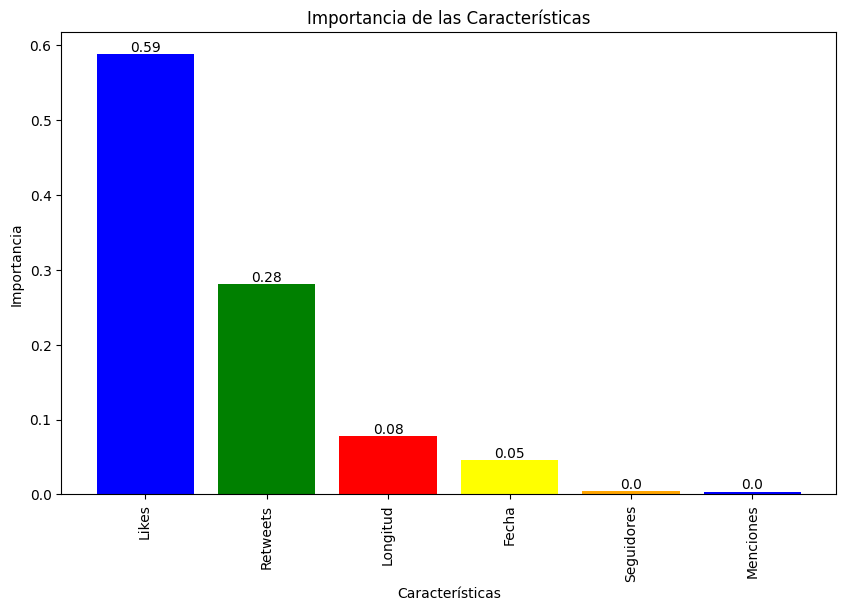

In [49]:
# Graficar la importancia de las características con colores y texto
plt.figure(figsize=(10, 6))
bars = plt.bar(feature_importances['Feature'], feature_importances['Importance'], color=colors)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')
plt.xticks(rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las Características')
plt.show()

Se calculó la importancia de las características utilizando el modelo de árbol de decisión. Las características se ordenaron en función de su importancia relativa en la toma de decisiones del modelo. Los resultados muestran que Likes es la más importante, seguida de Retweets, Longitud, y así sucesivamente. Esto proporciona una visión clara de las características que más influyen en la predicción de la variable objetivo y puede ser útil para identificar aspectos clave a considerar en futuros análisis y toma de decisiones

# **Comprobar si una publicación tendrá éxito**

En este fragmento de código se realizan las siguientes acciones:

Se convierte la columna de fecha en características numéricas: se utilizan las funciones pd.to_datetime y los métodos .dt.year, .dt.month y .dt.day para obtener las columnas de año, mes y día respectivamente.

Se calcula la suma total de retweets y likes mediante la operación data['Retweets'] + data['Likes'].

Se calcula el umbral como la media de la suma total utilizando np.mean(suma_total).

Se crea la variable objetivo binaria llamada "Exitosa" utilizando la función np.where. Si la suma total es mayor que el umbral, se asigna el valor 1, de lo contrario, se asigna el valor 0.

Los datos se dividen en características (X) y la variable objetivo (y).

Se crea y entrena un modelo de árbol de decisiones utilizando DecisionTreeClassifier() y model.fit(X, y).

Se crea un nuevo DataFrame llamado nueva_publicacion que contiene los datos de una nueva publicación a predecir. Se realiza el preprocesamiento de la fecha de la misma manera que se hizo para los datos originales.

Se seleccionan las columnas correspondientes de nueva_publicacion y se realiza la predicción de éxito de la publicación utilizando model.predict(nueva_publicacion).

Finalmente, se imprime el resultado de la predicción indicando si la publicación tendrá éxito o no.

In [50]:
# Convertir la columna de fecha a características numéricas
data['Fecha'] = pd.to_datetime(data['Fecha'])
data['Año'] = data['Fecha'].dt.year
data['Mes'] = data['Fecha'].dt.month
data['Día'] = data['Fecha'].dt.day

In [51]:
# Obtener la suma total de retweets y likes
suma_total = data['Retweets'] + data['Likes']

# Calcular el umbral como la media de la suma total
umbral = np.mean(suma_total)

# Crear la variable objetivo binaria
data['Exitosa'] = np.where(suma_total > umbral, 1, 0)

# Dividir los datos en características y variable objetivo
X = data[['Año', 'Mes', 'Día', 'Likes', 'Retweets', 'Longitud', 'Seguidores','Menciones']]  # Reemplaza los nombres de las columnas con tus propias características
y = data['Exitosa']  # Reemplaza 'Aceptacion' con el nombre de tu columna objetivo


In [52]:
# Crear el modelo de árbol de decisiones
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [53]:
# Datos de una nueva publicación a predecir
nueva_publicacion = pd.DataFrame({'Fecha': ['2023-11-25'], 'Likes': [800], 'Retweets': [900], 'Longitud': [40], 'Seguidores': [200000], 'Menciones': [2000]})
nueva_publicacion['Fecha'] = pd.to_datetime(nueva_publicacion['Fecha'])
nueva_publicacion['Año'] = nueva_publicacion['Fecha'].dt.year
nueva_publicacion['Mes'] = nueva_publicacion['Fecha'].dt.month
nueva_publicacion['Día'] = nueva_publicacion['Fecha'].dt.day
nueva_publicacion = nueva_publicacion[['Año', 'Mes', 'Día', 'Likes', 'Retweets', 'Longitud', 'Seguidores','Menciones']]


In [54]:
# Realizar la predicción de éxito de la nueva publicación
prediccion = model.predict(nueva_publicacion)

In [55]:
# Imprimir la predicción
if prediccion[0] == 1:
    print("La publicación tendrá éxito.")
else:
    print("La publicación no tendrá éxito.")

La publicación tendrá éxito.


Se implementó un modelo de árbol de decisiones para predecir el éxito de las publicaciones. Se utilizaron características como el año, mes, día, likes, retweets, longitud del contenido, seguidores y menciones. Los resultados mostraron que una nueva publicación tendrá éxito si se predice con el valor 1. Esto brinda una herramienta útil para evaluar el potencial de éxito de las publicaciones y tomar decisiones informadas sobre las estrategias de publicación.